# Análise Exploratória de Dados

## Dataset
- Fonte : https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent


## Informações sobre os dados

- Colunas
    - city: Nome da cidade onde os dados foram obtidos
    - area: Área em m² do imóvel 
    - rooms: Número de Quartos
    - bathroom:Número de Banheiros
    - parking spaces: Quantidade de garagens
    - floor: Andar do imovel
    - animal: Aceita Animais domesticos?
    - furniture: Imóvel Imobiliado?
    - hoa (R\$): Valor do condomínio
    - rent amount (R\$): Valor do Aluguel
    - property tax (R\$): Valor do IPTU
    - fire insurance (R\$): Valor do Seguro de Incêndio
    - total (R\$): Valor total de aluguel do imóvel

## Objetivos
- Os dados apresentam dados de outras cidades além de São Paulo (Rio de Janeiro, Campinas, Porto Alegre), o objetivo é fazer um recorte especifico da cidade de são Paulo e Análisar os dados

## Perguntas
- Permitir Animais de estimação aumenta o preço do aluguel? 
- Qual a proporção de imóveis que aceitam animais de estimação?
- Existe uma correlação entre a quantidade de quartos e o valor do condomínio?
- Como a quantidade de garagens se relaciona com o valor do seguro contra incêndio?
- Qual é a média de despesas com IPTU em São Paulo?
- Qual a diferença média de preço entre imóveis mobiliados e não mobiliados?

In [150]:
# imports
import pandas as pd
import seaborn as sns

In [151]:
# carregar base de dados
precoAluguelImoveisSP_df = pd.read_csv('./dados_preço_aluguel_BR.csv', sep=',')

In [152]:
precoAluguelImoveisSP_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Verificar Dados

In [153]:
precoAluguelImoveisSP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


* O floor está como object, mas é para ser um tipo int64, pois são valores numericos

### Corrigir coluna "floor"

In [154]:
# Transformar de object para numerico
precoAluguelImoveisSP_df['floor'] = pd.to_numeric(precoAluguelImoveisSP_df['floor'], errors='coerce')

In [155]:
precoAluguelImoveisSP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 10692 non-null  object 
 1   area                 10692 non-null  int64  
 2   rooms                10692 non-null  int64  
 3   bathroom             10692 non-null  int64  
 4   parking spaces       10692 non-null  int64  
 5   floor                8231 non-null   float64
 6   animal               10692 non-null  object 
 7   furniture            10692 non-null  object 
 8   hoa (R$)             10692 non-null  int64  
 9   rent amount (R$)     10692 non-null  int64  
 10  property tax (R$)    10692 non-null  int64  
 11  fire insurance (R$)  10692 non-null  int64  
 12  total (R$)           10692 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 1.1+ MB


In [156]:
# Verificar valores nulos
precoAluguelImoveisSP_df.isnull().any()

city                   False
area                   False
rooms                  False
bathroom               False
parking spaces         False
floor                   True
animal                 False
furniture              False
hoa (R$)               False
rent amount (R$)       False
property tax (R$)      False
fire insurance (R$)    False
total (R$)             False
dtype: bool

Os valores foram alterados para float, mas agora foi obtido valores nulos na coluna floor

Para resolver esse problema pode-se tirar essa coluna da análise, pode-se colocar valores padrões (exemplo, primeiro andar em todos) ou pode remover as linhas com dados faltantes.

Para prosseguir, irei filtrar os dados de interesse primeiro, ou seja, apenas imóveis da cidade de São Paulo, após isso tomarei a decisão do que fazer com os dados faltantes, pois se for poucos dados que estejam faltando para o caso de São Paulo, é possivel simplesmente remover as linhas com dados faltantes

In [157]:
# Pegar apenas dados da cidade de São Paulo
selecao = precoAluguelImoveisSP_df['city'] == 'São Paulo'

In [158]:
precoAluguelImoveisSP_df = precoAluguelImoveisSP_df[selecao]
precoAluguelImoveisSP_df.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7.0,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20.0,acept,not furnished,1200,4960,1750,63,7973
4,São Paulo,25,1,1,0,1.0,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,NaN,acept,not furnished,0,8000,834,121,8955
7,São Paulo,213,4,4,4,4.0,acept,not furnished,2254,3223,1735,41,7253


In [159]:
precoAluguelImoveisSP_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5887 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 5887 non-null   object 
 1   area                 5887 non-null   int64  
 2   rooms                5887 non-null   int64  
 3   bathroom             5887 non-null   int64  
 4   parking spaces       5887 non-null   int64  
 5   floor                4273 non-null   float64
 6   animal               5887 non-null   object 
 7   furniture            5887 non-null   object 
 8   hoa (R$)             5887 non-null   int64  
 9   rent amount (R$)     5887 non-null   int64  
 10  property tax (R$)    5887 non-null   int64  
 11  fire insurance (R$)  5887 non-null   int64  
 12  total (R$)           5887 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 643.9+ KB


Existem 5887 dados referente a cidade de São Paulo, e existem apenas 4273 dados na coluna floor que são validos, ou seja existem 1.614 dados invalidos nessa coluna, 27,41% dos dados seriam excluidos se optasse por tirar as linhas com dados nulos, como a coluna floor não tem significancia para as perguntas propostas, vou optar por remover a coluna floor.

In [160]:
# Remover coluna floor
del precoAluguelImoveisSP_df['floor']

In [161]:
precoAluguelImoveisSP_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5887 entries, 0 to 10691
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 5887 non-null   object
 1   area                 5887 non-null   int64 
 2   rooms                5887 non-null   int64 
 3   bathroom             5887 non-null   int64 
 4   parking spaces       5887 non-null   int64 
 5   animal               5887 non-null   object
 6   furniture            5887 non-null   object
 7   hoa (R$)             5887 non-null   int64 
 8   rent amount (R$)     5887 non-null   int64 
 9   property tax (R$)    5887 non-null   int64 
 10  fire insurance (R$)  5887 non-null   int64 
 11  total (R$)           5887 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 597.9+ KB


# Entendendo os dados

In [162]:
precoAluguelImoveisSP_df[['area','rooms','bathroom', 'parking spaces', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']].describe().T

,count,mean,std,min,25%,50%,75%,max
area,5887.0,158.899439,347.474169,11.0,59.0,106.0,212.0,24606.0
rooms,5887.0,2.558859,1.166365,1.0,2.0,3.0,3.0,10.0
bathroom,5887.0,2.467641,1.503060,1.0,1.0,2.0,4.0,10.0
parking spaces,5887.0,1.877527,1.687973,0.0,1.0,1.0,3.0,12.0
hoa (R$),5887.0,1169.627994,4076.461180,0.0,0.0,665.0,1608.5,220000.0
property tax (R$),5887.0,495.701716,4153.618928,0.0,37.0,170.0,550.0,313700.0
fire insurance (R$),5887.0,62.428911,50.073429,4.0,26.0,45.0,83.0,677.0
total (R$),5887.0,6380.831833,7541.320897,508.0,2631.0,4596.0,8591.0,316900.0


## Área

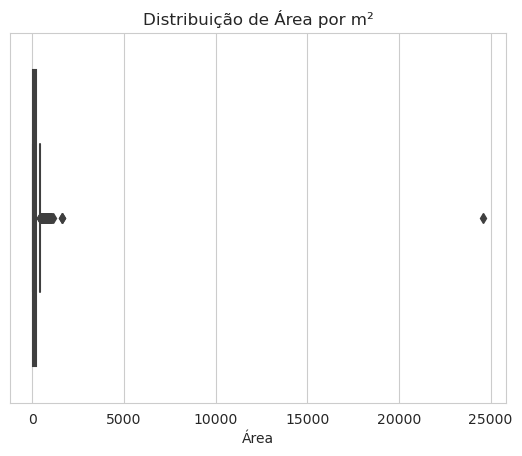

In [163]:
with sns.axes_style('whitegrid'):
    grafico = sns.boxplot(x=precoAluguelImoveisSP_df["area"])
    grafico.set(title='Distribuição de Área por m²', xlabel='Área');


Existe alguns outliers em relação a área dos imoveis, vou remover esses outliers dos dados para não causar inviesamento na análise, para remover os outliers, será usado o método do intervalo interquartil (IQR)

In [164]:
# Calcular o IQR
Q1 = precoAluguelImoveisSP_df['area'].quantile(0.25)
Q3 = precoAluguelImoveisSP_df['area'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover outliers
precoAluguelImoveisSP_df = precoAluguelImoveisSP_df[
    (precoAluguelImoveisSP_df['area'] >= limite_inferior) &
    (precoAluguelImoveisSP_df['area'] <= limite_superior)
]

In [169]:
precoAluguelImoveisSP_df[['area']].describe().T

,count,mean,std,min,25%,50%,75%,max
area,5636.0,135.193932,98.915144,11.0,57.0,100.0,200.0,440.0


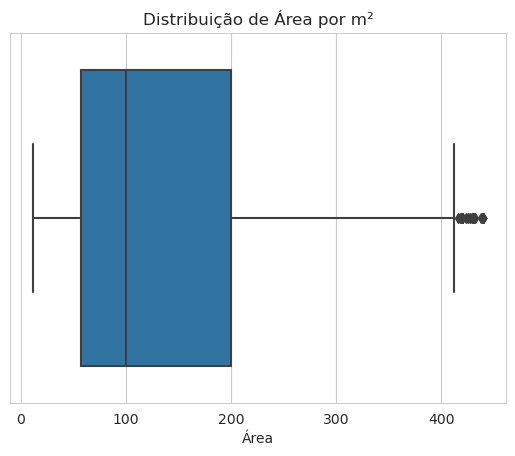

In [170]:
with sns.axes_style('whitegrid'):
    grafico = sns.boxplot(x=precoAluguelImoveisSP_df["area"])
    grafico.set(title='Distribuição de Área por m²', xlabel='Área');

## total

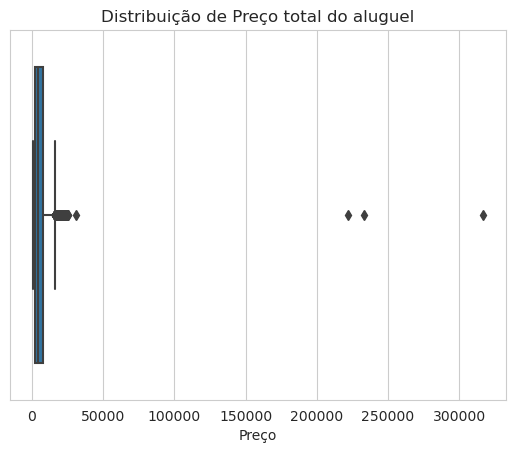

In [171]:
with sns.axes_style('whitegrid'):
    grafico = sns.boxplot(x=precoAluguelImoveisSP_df["total (R$)"])
    grafico.set(title='Distribuição de Preço total do aluguel', xlabel='Preço');


Existe alguns outliers em relação ao preço dos imoveis, vou remover esses outliers dos dados para não causar inviesamento na análise, para remover os outliers, será usado o método do intervalo interquartil (IQR)

In [172]:
# Calcular o IQR
Q1 = precoAluguelImoveisSP_df['total (R$)'].quantile(0.25)
Q3 = precoAluguelImoveisSP_df['total (R$)'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover outliers
precoAluguelImoveisSP_df = precoAluguelImoveisSP_df[
    (precoAluguelImoveisSP_df['total (R$)'] >= limite_inferior) &
    (precoAluguelImoveisSP_df['total (R$)'] <= limite_superior)
]

In [173]:
precoAluguelImoveisSP_df[['total (R$)']].describe().T

,count,mean,std,min,25%,50%,75%,max
total (R$),5400.0,5312.909074,3588.59154,508.0,2544.75,4190.5,7293.5,16100.0


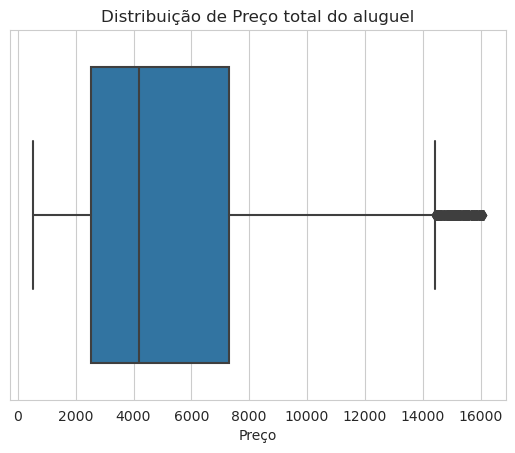

In [174]:
with sns.axes_style('whitegrid'):
    grafico = sns.boxplot(x=precoAluguelImoveisSP_df["total (R$)"])
    grafico.set(title='Distribuição de Preço total do aluguel', xlabel='Preço');


## Valor Condominio

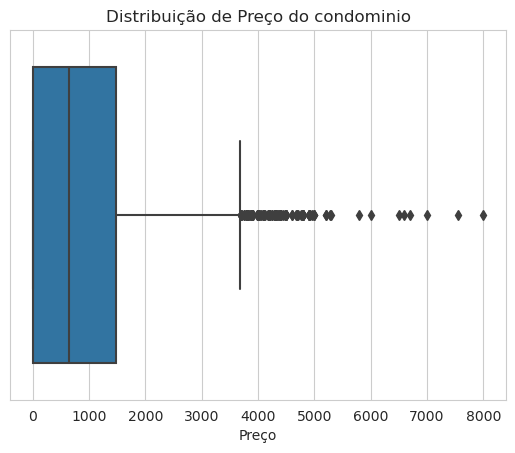

In [176]:
with sns.axes_style('whitegrid'):
    grafico = sns.boxplot(x=precoAluguelImoveisSP_df["hoa (R$)"])
    grafico.set(title='Distribuição de Preço do condominio', xlabel='Preço');


Existe alguns outliers em relação ao preço dos imoveis, vou remover esses outliers dos dados para não causar inviesamento na análise, para remover os outliers, será usado o método do intervalo interquartil (IQR)

In [177]:
# Calcular o IQR
Q1 = precoAluguelImoveisSP_df['hoa (R$)'].quantile(0.25)
Q3 = precoAluguelImoveisSP_df['hoa (R$)'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover outliers
precoAluguelImoveisSP_df = precoAluguelImoveisSP_df[
    (precoAluguelImoveisSP_df['hoa (R$)'] >= limite_inferior) &
    (precoAluguelImoveisSP_df['hoa (R$)'] <= limite_superior)
]

In [178]:
precoAluguelImoveisSP_df[['hoa (R$)']].describe().T

,count,mean,std,min,25%,50%,75%,max
hoa (R$),5259.0,873.965963,887.902192,0.0,0.0,612.0,1367.5,3678.0


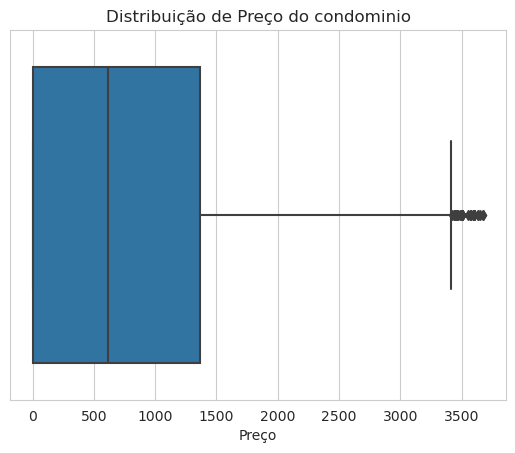

In [179]:
with sns.axes_style('whitegrid'):
    grafico = sns.boxplot(x=precoAluguelImoveisSP_df["hoa (R$)"])
    grafico.set(title='Distribuição de Preço do condominio', xlabel='Preço');


## Manipulações dos dados que ainda não foram manipulados

## Mudanças Gerais dos Dados depois das manipulações

In [180]:
precoAluguelImoveisSP_df[['area','rooms','bathroom', 'parking spaces', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']].describe().T

,count,mean,std,min,25%,50%,75%,max
area,5259.0,124.354250,91.061745,11.0,55.0,93.0,173.5,440.0
rooms,5259.0,2.402168,1.093431,1.0,2.0,2.0,3.0,10.0
bathroom,5259.0,2.211067,1.304214,1.0,1.0,2.0,3.0,9.0
parking spaces,5259.0,1.613995,1.466658,0.0,1.0,1.0,2.0,10.0
hoa (R$),5259.0,873.965963,887.902192,0.0,0.0,612.0,1367.5,3678.0
property tax (R$),5259.0,291.240540,404.459451,0.0,28.5,135.0,400.0,4710.0
fire insurance (R$),5259.0,52.320023,37.553543,4.0,25.0,41.0,69.0,226.0
total (R$),5259.0,5128.212398,3429.779164,508.0,2512.5,4089.0,6929.0,16100.0


### Total do aluguel

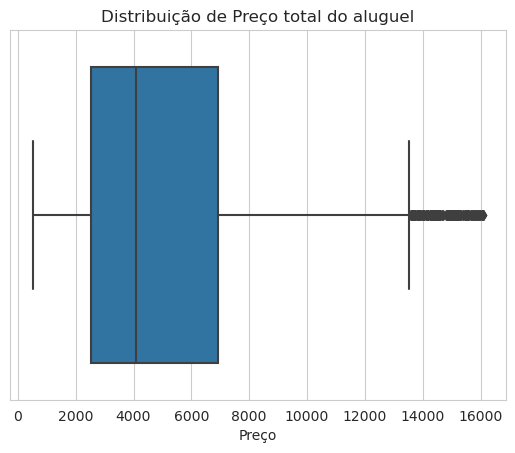

In [181]:
with sns.axes_style('whitegrid'):
    grafico = sns.boxplot(x=precoAluguelImoveisSP_df["total (R$)"])
    grafico.set(title='Distribuição de Preço total do aluguel', xlabel='Preço');


50% dos alugueis estão abaixo de 4089,0R$
75% dos alugueis estão abaixo de 6929.0R$
e
25% dos alugueis estão acima de 6929.0R$ chegando a 16100,0R$